In [ ]:
# titanic dataset. Predict survival

In [85]:
import os
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

In [3]:
TITANIC_PATH = os.path.join("datasets", "titanic")
TEST_PATH = "test.csv"
TRAIN_PATH = "train.csv"

In [4]:
# load data using pandas
def load_housing_data(path, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, path)
    return pd.read_csv(csv_path)

In [5]:
test = load_housing_data(TEST_PATH)
train = load_housing_data(TRAIN_PATH)

In [6]:
# show data summary

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# how many are there?

In [10]:
test.shape

(418, 11)

In [11]:
train.shape

(891, 12)

In [27]:
data = train.copy()

In [28]:
# lets see some info about the train data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# 177 age missing
# 687 cabin missing
# 2 embarked missing

In [14]:
# how much of each?

In [29]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [30]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [31]:
data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [32]:
data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [33]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
# numerical summary
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


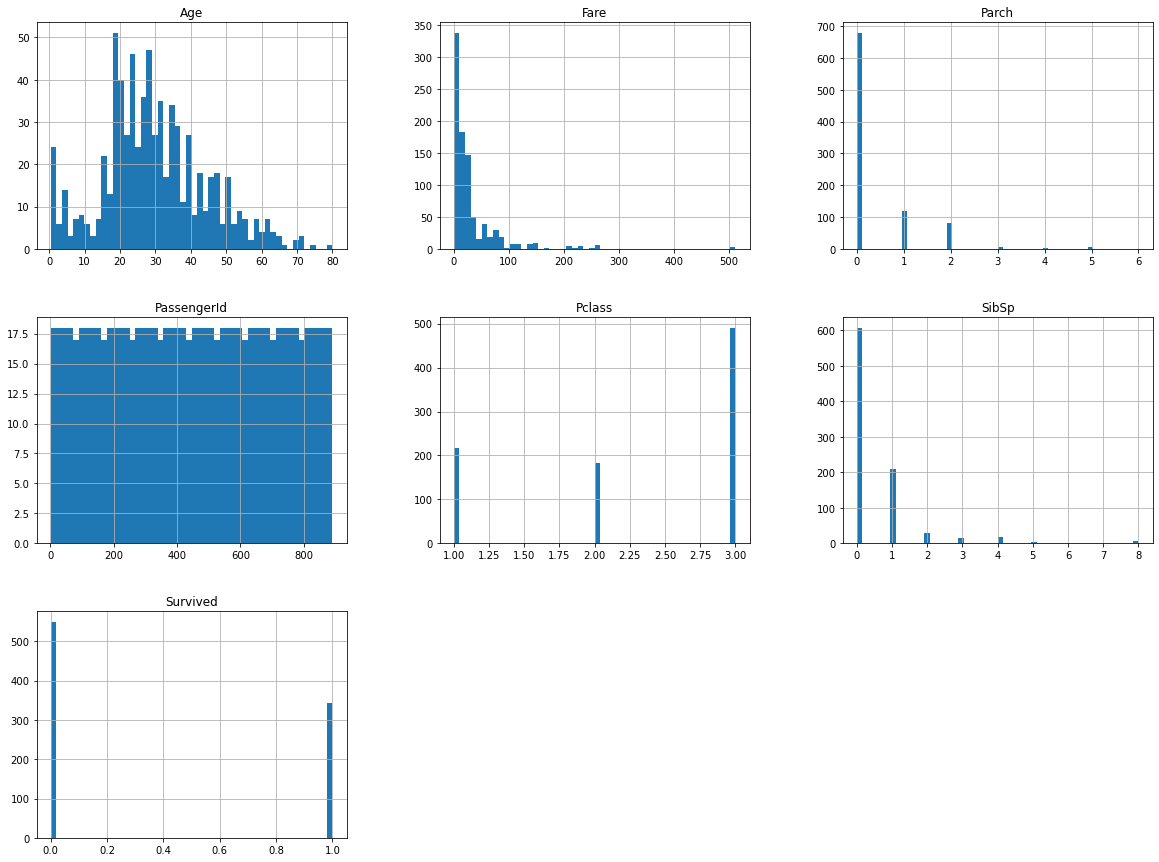

In [35]:
# plot histogram for the data
data.hist(bins=50, figsize=(20,15))
plt.show()

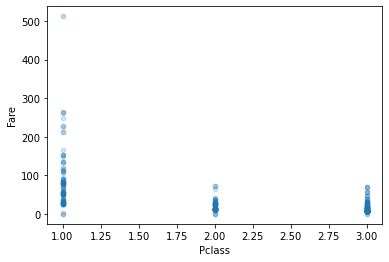

In [36]:
# visualise class data
data.plot(kind="scatter", x="Pclass", y="Fare", alpha=0.1)

In [37]:
# looking for correlations 
corr_matrix = data.corr()

In [39]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [40]:
# Fare and Pclass seem to have biggest correlation

In [47]:
# there isn't really good candidates for new features

In [48]:
# methods to handle missing data
# 1) get rid of districts with missing data. housing.dropna(subset=["total_bedrooms"])
# 2) get rid of attribute. housing.drop("total_bedrooms", axis=1)
# 3) set the missing values housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)

In [51]:
# missing data
# not enough cabin data - drop the column
data = data.drop("Cabin", axis=1)
# only 2 missing embarked - drop those districts
data = data.dropna(subset=["Embarked"])

In [53]:
# drop useless columns
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [70]:
survival = data.drop('Survived', axis=1)
survival_labels = data['Survived'].copy()

In [71]:
# create data pipelines

In [66]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scalar', StandardScaler())
])

In [69]:
num_attribs = ['Age', 'Fare']
cat_attribs = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [73]:
survival_prepared = full_pipeline.fit_transform(data)

In [76]:
survival_prepared

<889x24 sparse matrix of type '<class 'numpy.float64'>'
	with 6223 stored elements in Compressed Sparse Row format>

In [80]:
df = pd.DataFrame(survival_prepared.toarray())

In [81]:
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.563674,-0.500240,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.669217,0.788947,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.255451,-0.486650,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.438050,0.422861,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.438050,-0.484133,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.178396,-0.384475,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,-0.794841,-0.042213,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
886,-0.101340,-0.174084,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,-0.255451,-0.042213,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [83]:
sgd_classifier = SGDClassifier(random_state=42)

In [84]:
sgd_classifier.fit(survival_prepared, survival_labels)

SGDClassifier(random_state=42)

In [94]:
cross_val_score(sgd_classifier, survival_prepared, survival_labels, cv=3, scoring="accuracy")

array([0.78114478, 0.78716216, 0.81418919])

In [95]:
forest_classifier = RandomForestClassifier(random_state=42)

In [96]:
forest_classifier.fit(survival_prepared, survival_labels)

RandomForestClassifier(random_state=42)

In [97]:
cross_val_score(forest_classifier, survival_prepared, survival_labels, cv=3, scoring="accuracy")

array([0.73400673, 0.80067568, 0.78040541])